# Séries Temporais Bolsa de Valores
Acompanhando o curso do [https://didatica.tech](https://didatica.tech/curso-aprendizado-por-reforco-algoritmos-geneticos-nlp-e-gans/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import math
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
# Dataset índice S&P500: https://www.kaggle.com/datasets/benjibb/sp500-since-1950
dados = pd.read_csv('data/sp500.csv')

In [3]:
dados.shape

(17218, 7)

In [4]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


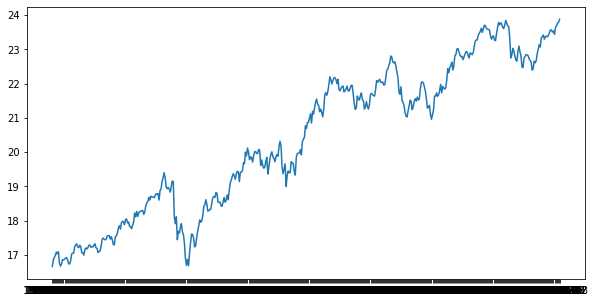

In [5]:
# Mostrando o gráfico no período dos 3 primeiros anos (1950-1952)
X = dados['Date'][:500]
y = dados['Close'][:500]
plt.figure(figsize=(10, 5 ))
plt.plot(X, y);

In [6]:
# Criando um dataset com os dados X e y
dataset = pd.concat([X, y], axis=1)
dataset.columns = ['X', 'y']
dataset.head()

,X,y
0,1950-01-03,16.66
1,1950-01-04,16.85
2,1950-01-05,16.93
3,1950-01-06,16.98
4,1950-01-09,17.08


In [7]:
tamanho_treino = int(len(dataset) * 0.7)
treino, teste = dataset[:tamanho_treino], dataset[tamanho_treino:]

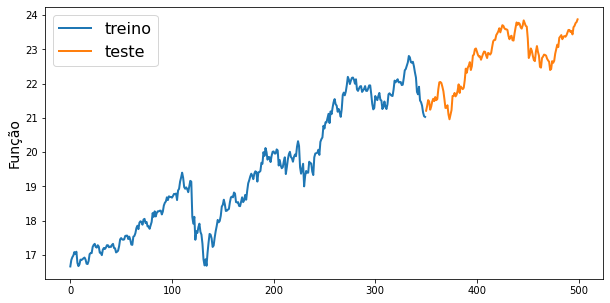

In [8]:
# Mostrando quais dados servirão para treino e para teste
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(treino['y'], label='treino', linewidth=2)
ax.plot(teste['y'], label='teste', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16);

In [9]:
# Criando a função para agrupar os dados em windows
def gera_dataset(dataset, tamanho_janela = 1):
    X, y = [],[]
    for i in range(len(dataset)-tamanho_janela):
        X.append(dataset.loc[(dataset.index[0] + i):(dataset.index[0] + i + tamanho_janela - 1)]['y'].values)
        y.append(dataset.loc[[dataset.index[0] + i + tamanho_janela]]['y'].values)
    return np.asarray(X, dtype=np.float32), np.asarray(y, dtype=np.float32)

In [10]:
# Aplicando a função dos datasets de treino e teste que já criamos:
tamanho_janela = 20
X_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
X_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [11]:
X_treino[:1], y_treino[:1]

(array([[16.66, 16.85, 16.93, 16.98, 17.08, 17.03, 17.09, 16.76, 16.67,
         16.72, 16.86, 16.85, 16.87, 16.9 , 16.92, 16.86, 16.74, 16.73,
         16.82, 17.02]], dtype=float32),
 array([[17.05]], dtype=float32))

In [12]:
X_treino.shape

(330, 20)

In [13]:
# Transformando o problema temporal em um não temporal
# Criando o modelo MPL com número de neurônios de entrada == tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo_basico = Sequential()

# Camada de entrada + camanda oculta
modelo_basico.add(Dense(8, input_dim=tamanho_janela, activation='relu'))

# Camada de saída
modelo_basico.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo_basico.compile(loss='mean_squared_error', optimizer='adam')
modelo_basico.fit(X_treino, y_treino, epochs=500, batch_size=10, verbose=2)

Epoch 1/500
33/33 - 0s - loss: 275.1863 - 227ms/epoch - 7ms/step
Epoch 2/500
33/33 - 0s - loss: 113.3731 - 15ms/epoch - 455us/step
Epoch 3/500
33/33 - 0s - loss: 13.8724 - 16ms/epoch - 486us/step
Epoch 4/500
33/33 - 0s - loss: 0.3149 - 17ms/epoch - 515us/step
Epoch 5/500
33/33 - 0s - loss: 0.2375 - 17ms/epoch - 515us/step
Epoch 6/500
33/33 - 0s - loss: 0.2249 - 18ms/epoch - 549us/step
Epoch 7/500
33/33 - 0s - loss: 0.2260 - 17ms/epoch - 526us/step
Epoch 8/500
33/33 - 0s - loss: 0.2255 - 18ms/epoch - 545us/step
Epoch 9/500
33/33 - 0s - loss: 0.2259 - 18ms/epoch - 545us/step
Epoch 10/500
33/33 - 0s - loss: 0.2249 - 18ms/epoch - 545us/step
Epoch 11/500
33/33 - 0s - loss: 0.2245 - 17ms/epoch - 515us/step
Epoch 12/500
33/33 - 0s - loss: 0.2242 - 15ms/epoch - 455us/step
Epoch 13/500
33/33 - 0s - loss: 0.2240 - 16ms/epoch - 484us/step
Epoch 14/500
33/33 - 0s - loss: 0.2262 - 16ms/epoch - 485us/step
Epoch 15/500
33/33 - 0s - loss: 0.2241 - 17ms/epoch - 515us/step
Epoch 16/500
33/33 - 0s - loss

In [14]:
# Estimando a performance do modelo
score_treino = modelo_basico.evaluate(X_treino, y_treino, verbose=0)
score_teste = modelo_basico.evaluate(X_teste, y_teste, verbose=0)

print(f'Score em Treino: {score_treino:.2f} MSE ({math.sqrt(score_treino):.2f} RMSE)')
print(f'Score em Teste: {score_teste:.2f} MSE ({math.sqrt(score_teste):.2f} RMSE)')

Score em Treino: 0.04 MSE (0.21 RMSE)
Score em Teste: 0.04 MSE (0.19 RMSE)


In [15]:
# Gerando previsões para mostrar no gráfico
previsoes = modelo_basico.predict(X_teste)

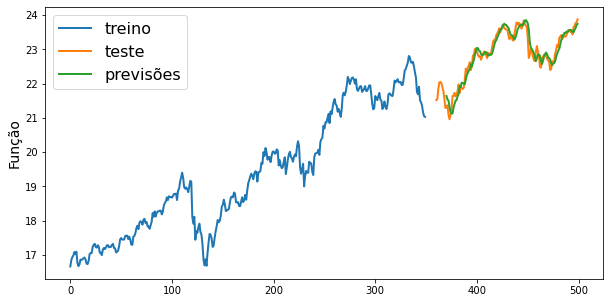

In [16]:
# PLotando os valores previstos pelo modelo com os valores reais
# Vamos criar um dataset de mesmo tamanho do teste, iniciando em tamanho_janela: teste[tamanho_janela:], pois é assim que y_teste foi
# criado. Iremos usar teste[tamanho_janela:] em vez de y_teste como referência por causa dos índices, pois queremos plotar no gráfico
# nas posições certas.
previsto = teste[tamanho_janela:].copy()
previsto['y'] = previsoes # Coloca os valores das previsões do modelo dentro dessa variável
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(treino['y'], label='treino', linewidth=2)
ax.plot(teste['y'][10:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)
# Obs: fica um gap pq começa de 10 unidades para frente!


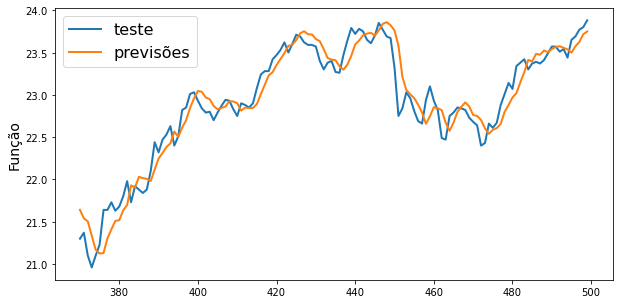

In [17]:
# Olhando mais de perto:
previsto = teste[tamanho_janela:].copy()
previsto['y'] = previsoes
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(teste['y'][tamanho_janela:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16);

## Utilizando LSTM

In [18]:
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset['y'] = scaler.fit_transform(dataset['y'].values.reshape(-1,1))
tamanho_treino = int(len(dataset) * 0.7)
treino, teste = dataset[:tamanho_treino], dataset[tamanho_treino:]

In [20]:
# Aplicando a função para gerar os datasets de treino e teste:
tamanho_janela = 10
X_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
X_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input (colocando os dados temporais como features:
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1)) # Pega o dataset X_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset X_treino com essas 3 dimensões.
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [21]:
X_treino.shape, X_teste.shape

((340, 10, 1), (140, 10, 1))

In [22]:
# Criando o modelo LSTM:
modelo_lstm = Sequential()
modelo_lstm.add(LSTM(4, batch_input_shape = (2, X_treino.shape[1], X_treino.shape[2]), stateful=True))

modelo_lstm.add(Dense(1)) # Saída da LSTM
modelo_lstm.compile(loss='mean_squared_error', optimizer='adam')
modelo_lstm.fit(X_treino, y_treino, epochs=300, batch_size=2, verbose=2)

Epoch 1/300
170/170 - 1s - loss: 0.0200 - 1s/epoch - 6ms/step
Epoch 2/300
170/170 - 0s - loss: 0.0049 - 229ms/epoch - 1ms/step
Epoch 3/300
170/170 - 0s - loss: 0.0029 - 231ms/epoch - 1ms/step
Epoch 4/300
170/170 - 0s - loss: 0.0021 - 241ms/epoch - 1ms/step
Epoch 5/300
170/170 - 0s - loss: 0.0018 - 235ms/epoch - 1ms/step
Epoch 6/300
170/170 - 0s - loss: 0.0015 - 236ms/epoch - 1ms/step
Epoch 7/300
170/170 - 0s - loss: 0.0015 - 239ms/epoch - 1ms/step
Epoch 8/300
170/170 - 0s - loss: 0.0013 - 235ms/epoch - 1ms/step
Epoch 9/300
170/170 - 0s - loss: 0.0012 - 231ms/epoch - 1ms/step
Epoch 10/300
170/170 - 0s - loss: 0.0013 - 239ms/epoch - 1ms/step
Epoch 11/300
170/170 - 0s - loss: 0.0011 - 260ms/epoch - 2ms/step
Epoch 12/300
170/170 - 0s - loss: 0.0011 - 241ms/epoch - 1ms/step
Epoch 13/300
170/170 - 0s - loss: 0.0011 - 236ms/epoch - 1ms/step
Epoch 14/300
170/170 - 0s - loss: 0.0011 - 245ms/epoch - 1ms/step
Epoch 15/300
170/170 - 0s - loss: 0.0010 - 269ms/epoch - 2ms/step
Epoch 16/300
170/170 -

In [23]:
from sklearn.metrics import mean_squared_error

# Previsões
previsoes_treino = modelo_lstm.predict(X_treino, batch_size=2)
previsoes_teste = modelo_lstm.predict(X_teste, batch_size=2)

# Invertendo as previsões por conta da normalização
inv_previsoes_treino = scaler.inverse_transform(previsoes_treino.reshape(-1,1))
inv_y_treino = scaler.inverse_transform(y_treino.reshape(-1,1))

inv_previsoes_teste = scaler.inverse_transform(previsoes_teste.reshape(-1,1))
inv_y_teste = scaler.inverse_transform(y_teste.reshape(-1,1))

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(inv_y_treino, inv_previsoes_treino))
score_teste = math.sqrt(mean_squared_error(inv_y_teste, inv_previsoes_teste))

print(f'Score em Treino: {score_treino:.2f} RMSE')
print(f'Score em Teste: {score_teste:.2f} RMSE')

Score em Treino: 0.18 RMSE
Score em Teste: 0.14 RMSE


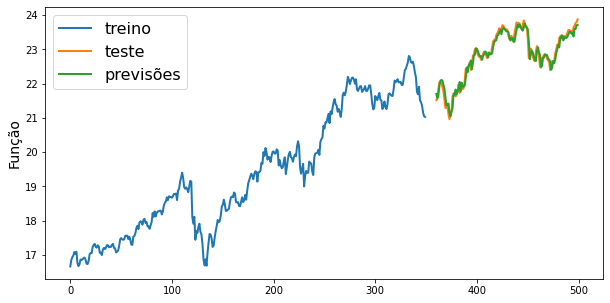

In [24]:
previsto = teste[tamanho_janela:].copy()
previsto['y'] = inv_previsoes_teste # Coloca os valores das previsões do modelo dentro dessa variável
fig, ax = plt.subplots(1, figsize=(10, 5))

chart_treino = treino.copy()
chart_teste = teste.copy()
chart_treino['y'] = scaler.inverse_transform(treino['y'].values.reshape(-1,1))
chart_teste['y'] = scaler.inverse_transform(teste['y'].values.reshape(-1,1))

ax.plot(chart_treino['y'], label='treino', linewidth=2)
ax.plot(chart_teste['y'][tamanho_janela:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)
# Obs: fica um gap pq começa de 10 unidades para frente!

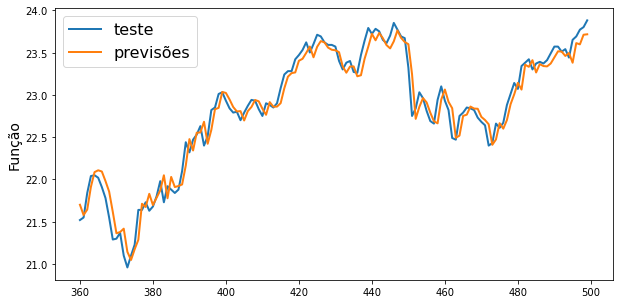

In [25]:
# Olhando mais de perto:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(chart_teste['y'][tamanho_janela:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)